<a href="https://colab.research.google.com/github/hidensuport/demo/blob/master/lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("insurance.csv")

In [6]:
cd

/root


In [ ]:
pip install sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=000ab07db607c7faaed92f1c96689803d0cc2fb3b473831a148669814fc2a1b8
  Stored in directory: /root/.cache/pip/wheels/14/25/f7/1cc0956978ae479e75140219088deb7a36f60459df242b1a72
Successfully built sklearn


In [ ]:
import pandas as pd
import sklearn as sk
from google.colab import drive
import matplotlib.pyplot as plt

In [8]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
from sklearn.linear_model import LinearRegression

In [3]:
from sklearn.linear_model import LassoCV
from sklearn import preprocessing

In [9]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
df.loc[df["sex"] == "female","sex"] =1
df.loc[df["sex"] == "male","sex"] =0

In [11]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [12]:
df.loc[df["region"] == "southwest","region"] =1
df.loc[df["region"] == "southeast","region"] =2
df.loc[df["region"] == "northwest","region"] =3
df.loc[df["region"] == "northeast","region"] =4

In [13]:
df.loc[df["smoker"] == "yes","smoker"] =1
df.loc[df["smoker"] == "no","smoker"] =0


In [17]:
data = np.array(df.iloc[:,:4])
target = np.array(df.iloc[:,-1])

In [18]:
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [19]:
data

array([[19, 1, 27.9, 0],
       [18, 0, 33.77, 1],
       [28, 0, 33.0, 3],
       ...,
       [18, 1, 36.85, 0],
       [21, 1, 25.8, 0],
       [61, 1, 29.07, 0]], dtype=object)

# 2.) Split the data into 80/20, in/out sample

In [21]:
cut = int((len(data)*.8) //1 )

In [33]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [25]:
scaler = preprocessing.StandardScaler().fit(in_data)
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [26]:
in_data

array([[19, 1, 27.9, 0],
       [18, 0, 33.77, 1],
       [28, 0, 33.0, 3],
       ...,
       [39, 0, 42.655, 0],
       [63, 0, 21.66, 1],
       [54, 1, 31.9, 1]], dtype=object)

In [27]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, -0.90286618],
       [-1.52464584, -0.97964634,  0.4911621 , -0.06353793],
       [-0.81719959, -0.97964634,  0.36455128,  1.61511857],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, -0.90286618],
       [ 1.65886228, -0.97964634, -1.50008089, -0.06353793],
       [ 1.02216066,  1.02077653,  0.18367867, -0.06353793]])

# 4.) Get lambda from Lasso cross validation

In [29]:
from sklearn.linear_model import LassoCV

In [34]:
modCV = LassoCV().fit(in_data_scale,in_target)

In [35]:
a = modCV.alpha_

In [36]:
a

4.391142735104407

# 5.) Run a lasso regression with that Lambda

In [71]:
model1 = Lasso(alpha = 4.391142735104407).fit(in_data_scale,in_target)

In [43]:
from sklearn.linear_model import Lasso

In [57]:
in_data = data[:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]


# 6.) Visualize the coefficients 

In [68]:

from yellowbrick.regressor import PredictionError, ResidualsPlot

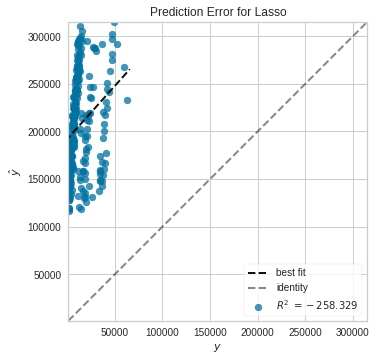

In [74]:
model2 = Lasso()
visualizer = PredictionError(model1)
visualizer.fit(in_data, in_target)  
visualizer.score(out_data, out_target)  
visualizer.poof()

# 7.) Interpret the coefficients

In [ ]:
Lambda is the Tuning Parameter that controls the bias-variance tradeoff and here we set alpha = 4.29 means beta is small and less important

# 8.) Compare in and out of sample MSE’s


In [60]:
from sklearn.model_selection import cross_val_score
model1.predict(in_data)
scores = cross_val_score(model1, in_data, in_target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)

[-11296.50320746 -11504.11138562 -11365.09571565 -11190.12491844
 -10884.91426107]


In [62]:
model1.predict(out_data)
scores = cross_val_score(model1, out_data, out_target, cv=5, scoring='neg_root_mean_squared_error')
print(scores)

[-12445.16858332 -11279.5616611  -11865.54929078 -10937.95709556
 -13234.53147077]


In [ ]:
the MSE result is very close.